# <span style="color:darkblue"> Lecture 15a: Regression Trees
 </span>

<font size = "5">



<font size = "5">

Install the "graphviz" library. In the terminal:

```pip install graphviz``` (Visualize regression trees) <br>
```pip install ISLP```     (Data from Intro to Statistical Learning)

# <span style="color:darkblue"> I. Setup Working Environment </span>


In [3]:
!pip install numpy 

In [4]:
# The "pandas" library is used for processing datasets
# The "numpy" is for numeric observations and random numbers
# The "matplotlib.pyplot" library is for creating graphs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# We will use the "sklearn" package

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn import tree
import sklearn.model_selection as skm
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.ensemble import GradientBoostingRegressor as GBR

# This is used to create data matrices
import patsy

# This is used to visualize regreesion trees
import graphviz

# Import content from the book "Introduction to Statistical Learning"
import ISLP



# <span style="color:darkblue"> II. Mashable Dataset </span>


<font size = "5">

Import data


In [5]:
articles_train  = pd.read_csv("data_raw/ArticlesTrain.csv")
articles_test   = pd.read_csv("data_raw/ArticlesTest.csv")


<font size = "5">

Create features matrix ($X$) and labels/outcomes $(Y)$


In [6]:
# Extract all columns except "shares" (the outcome)
X_train = articles_train.drop(columns = ["shares"])
X_test  = articles_test.drop(columns = ["shares"])

# Extract shares (the outcome)
y_train = articles_train[["shares"]]
y_test = articles_test[["shares"]]

# <span style="color:darkblue"> II. Bagged Trees & Random Forest </span>

<font size = "5">

Fit random forest (default)

- Uses random subset of features in each tree
- Random state sets a seed for tie breaking

In [7]:
bagged_model = RF(max_features=X_train.shape[1], 
                  random_state=0)
bagged_model.fit(X_train, y_train)

/Users/aolyu/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_features=50, random_state=0)

<font size = "5">

Fit random forest (default)

- Uses random subset of features in each tree

In [8]:
rf_model = RF(random_state=0)
rf_model.fit(X_train, y_train)

/Users/aolyu/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=0)

# <span style="color:darkblue"> III. Boosting </span>

<font size = "5">

Estimate Boosting Tree

- Learning rate is a runing parameter

In [9]:
# Test out-of-sample prediction

boost_model = GBR(n_estimators=5000, 
                   learning_rate=0.2, 
                   max_depth=3, 
                   random_state=0)
boost_model.fit(X_train, y_train)
y_hat_boost = boost_model.predict(X_test); 

# Test out-of-sample prediction
np.mean((np.array(y_test) - y_hat_boost)**2)

/Users/aolyu/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9382273514011938

# <span style="color:darkblue"> IV. Exercises </span>

<font size = "5">

- Which ensemble method performs best in terms of out-of-sample MSE?
- How does boosting performance depend on the learning rate




In [15]:
# Write your own code
# Random Forest
mse = np.mean((np.array(y_test) - rf_model.predict(X_test))**2)
print(mse)

# Boosting
mse1 = np.mean((np.array(y_test) - boost_model.predict(X_test))**2)
print(mse1)

# Therefore, the Random Forest model is better than the Boosting model

0.7748749613899922
0.9382273514011938


/Users/aolyu/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/aolyu/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/aolyu/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/aolyu/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

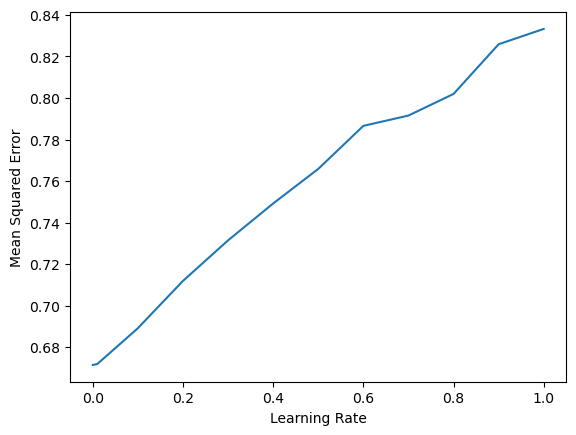

In [17]:
# The performance of boosting depend on the learning rate
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
mse = []
for i in learning_rate:
    boost_model = GBR(n_estimators=10, 
                      learning_rate=i, 
                      max_depth=3, 
                      random_state=0)
    boost_model.fit(X_train, y_train)
    y_hat_boost = boost_model.predict(X_test)
    mse.append(np.mean((np.array(y_test) - y_hat_boost)**2))

plt.plot(learning_rate, mse)
plt.xlabel("Learning Rate")
plt.ylabel("Mean Squared Error")
plt.show()
